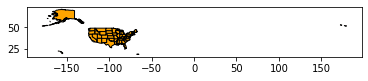

In [5]:
import geopandas
from matplotlib import pyplot as plt
us = geopandas.read_file("zip://states.zip")
us.plot(color="orange", edgecolor="k")

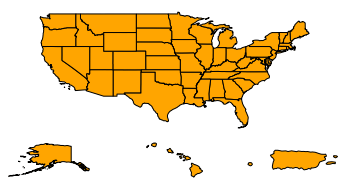

In [7]:
us.set_index("STUSPS", drop=False, inplace=True)
continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
ak = us.loc["AK":"AK"]
hi = us.loc["HI":"HI"]
pr = us.loc["PR":"PR"]

fig = plt.figure()
gs = fig.add_gridspec(5, 3)
ax1 = fig.add_subplot(gs[:3, :])
ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax4 = fig.add_subplot(gs[3, 2])

continent.plot(color="orange", edgecolor="k", ax=ax1)
ak.plot(color="orange", edgecolor="k", ax=ax2)
hi.plot(color="orange", edgecolor="k", ax=ax3)
pr.plot(color="orange", edgecolor="k", ax=ax4)

ax2.set_xlim(-180, -120)
for ax in fig.axes:
    ax.axis("off")

# Part 4

In [19]:
from shapely.geometry import Polygon, Point
from matplotlib import pyplot as plt
from descartes import PolygonPatch

def venn(a_label, a_set, b_label, b_set):
    #a_set = {1, 2, 3}
    #b_set = {3, 4, 5, 6, 7, 8}

    qa = len(a_set.difference(b_set))
    qb = len(b_set.difference(a_set))
    qab = len(a_set.intersection(b_set))
    q_max = max(qa, qb, qab)

    fig,ax = plt.subplots(figsize=(3,2))
    ax.set_xlim(0,3)
    ax.set_ylim(0,2)

    c1 = Point(1, 1).buffer(1)
    ax.text(1, 2, a_label, size=20, va="bottom", ha="right")
    c2 = Point(2, 1).buffer(1)
    ax.text(2, 2, b_label, size=20, va="bottom", ha="left")
    A = c1.difference(c2)
    B = c2.difference(c1)
    AB = c1.intersection(c2)

    for quantity, area in [(qa, A), (qb, B), (qab, AB)]:
        percent_of_max = quantity / q_max
        bg_color = (1-percent_of_max)*0.6 + 0.4
        ax.add_artist(PolygonPatch(area, facecolor=str(bg_color)))
        ax.text(area.centroid.x, area.centroid.y, quantity, size=16)
    plt.axis("off")
    
    return ax

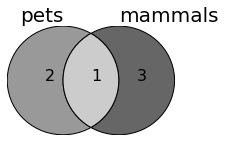

In [20]:
venn("pets", {"dogs", "snakes", "birds"}, 
     "mammals", {"dogs", "cats", "whales", "gorillas"})